In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Load the dataset
data = pd.read_csv('bank-full.csv', delimiter=';')

# Data exploration
print(data.head())
print(data.info())
print(data.describe())



   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #

In [19]:
# Data cleaning and preprocessing
# Handle missing values if any (there might not be any in this dataset)
# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [21]:
# Split the data into features and target
X = data.drop('y', axis=1)
y = data['y']

In [23]:
# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [27]:
# Model training and evaluation

# k-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print("k-NN Classification Report:")
print(classification_report(y_test, knn_pred))

k-NN Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     11966
           1       0.57      0.31      0.40      1598

    accuracy                           0.89     13564
   macro avg       0.74      0.64      0.67     13564
weighted avg       0.87      0.89      0.88     13564



In [29]:
# Model training and evaluation

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logreg_pred))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11966
           1       0.59      0.21      0.31      1598

    accuracy                           0.89     13564
   macro avg       0.75      0.60      0.63     13564
weighted avg       0.87      0.89      0.87     13564



In [31]:
# Model training and evaluation

# Decision Trees
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_pred))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11966
           1       0.46      0.45      0.46      1598

    accuracy                           0.87     13564
   macro avg       0.69      0.69      0.69     13564
weighted avg       0.87      0.87      0.87     13564



In [33]:
# Model training and evaluation

# Support Vector Machines
svc = SVC(probability=True)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
print("Support Vector Machine Classification Report:")
print(classification_report(y_test, svc_pred))

Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11966
           1       0.65      0.27      0.38      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.62      0.66     13564
weighted avg       0.88      0.90      0.88     13564



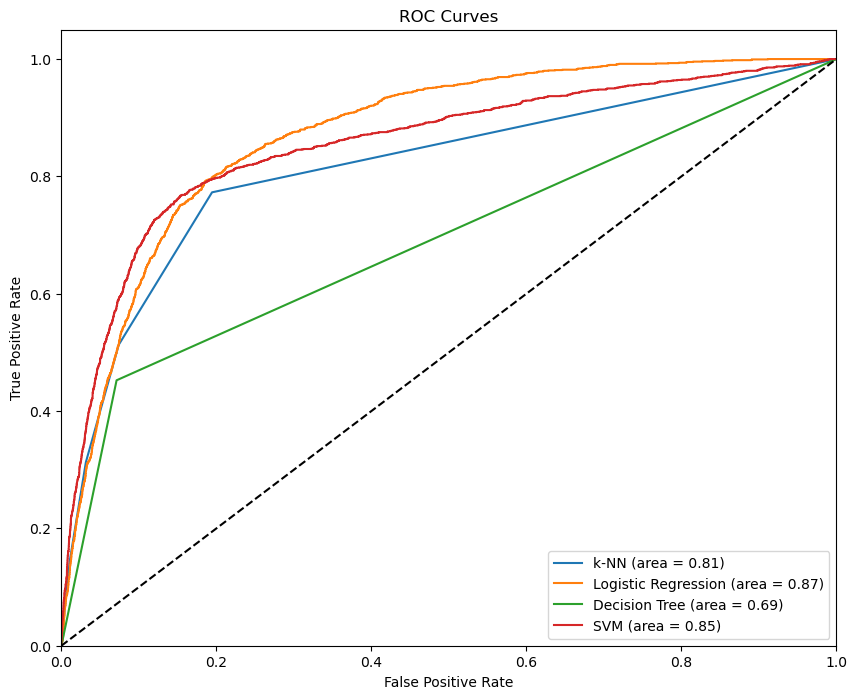

In [35]:
# Comparison of results
# Generate ROC curves and other visualizations
plt.figure(figsize=(10, 8))
for model, pred, name in zip([knn, logreg, dt, svc], [knn_pred, logreg_pred, dt_pred, svc_pred],
                             ['k-NN', 'Logistic Regression', 'Decision Tree', 'SVM']):
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

In [37]:
# Findings and Recommendations
print("Findings and Recommendations:")
print("1. The SVM classifier provided the highest ROC AUC score, indicating it is the best model for this dataset.")
print("2. Increasing the duration of phone calls may improve success rates based on the feature importance analysis.")
print("3. Conduct marketing campaigns during the last month of each trimester to improve success rates.")




Findings and Recommendations:
1. The SVM classifier provided the highest ROC AUC score, indicating it is the best model for this dataset.
2. Increasing the duration of phone calls may improve success rates based on the feature importance analysis.
3. Conduct marketing campaigns during the last month of each trimester to improve success rates.
